In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import os

%matplotlib inline

In [4]:
DATA_PATH = "/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/"

for dirname, _, filenames in os.walk(DATA_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/prices-split-adjusted.csv
/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/fundamentals.csv
/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/prices.csv
/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/securities.csv


In [5]:
PRICES_PATH = "/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/prices.csv"

In [6]:
# load raw data
prices = pd.read_csv(PRICES_PATH)
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


# Scales
line plot with price

> Figure 3

In [7]:
data = prices.loc[prices["symbol"].isin(["AMZN", "AAPL"])].sort_values(["symbol", "date"])

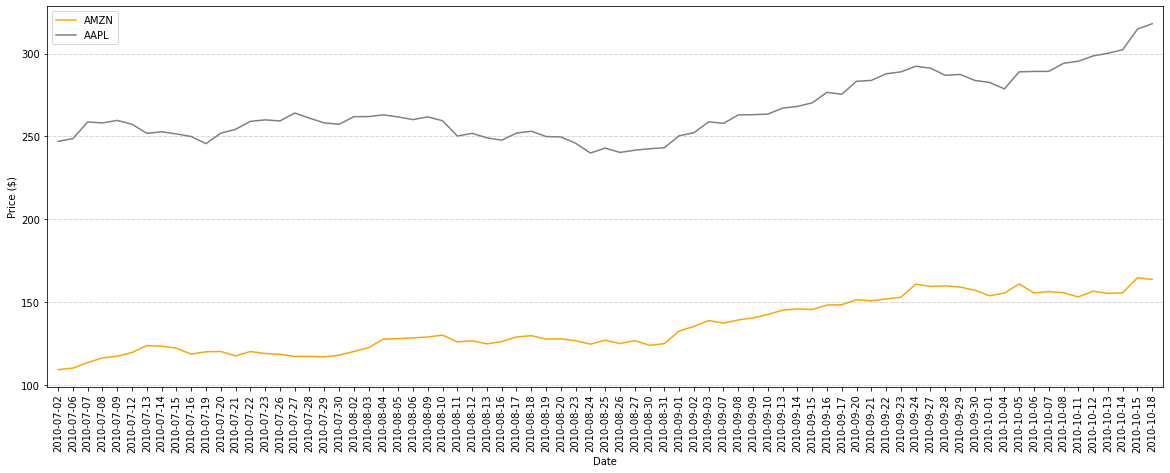

In [8]:
dates = data.loc[data["symbol"] == "AMZN", "date"][125:200].values.tolist()
amzn_price = data.loc[data["symbol"] == "AMZN", "close"][125:200].values.tolist()
aapl_price = data.loc[data["symbol"] == "AAPL", "close"][125:200].values.tolist()

dates_labels = [pd.to_datetime(str(date)).strftime("%Y-%m-%d") for date in dates]

fig, ax = plt.subplots(figsize=(20, 7))
p1, = ax.plot(dates, amzn_price, color="orange", label="AMZN")
p2, = ax.plot(dates, aapl_price, color="gray", label="AAPL")

ax.set_xticks(dates, minor=False)
ax.set_xticklabels(dates_labels, rotation=90)
ax.set_ylabel("Price ($)")
ax.set_xlabel("Date")
ax.set_xlim("2010-07-02", "2010-10-18", auto=True)
ax.margins(x=0.01)
ax.legend(handles=[p1, p2])

plt.grid(axis="y", which="both", linestyle='-.', linewidth=0.5)  

plt.show();

Candles with mpl
> Figure 4

In [22]:
data_mpl = data.loc[data["symbol"] == "AMZN"].rename(columns={
    "open": "Open",
    "high": "High",
    "low": "Low",
    "close": "Close",
    "volume": "Volume",
    "date": "Date"
    })

data_mpl["Date"] = data_mpl["Date"].map(lambda x: pd.to_datetime(x))
data_mpl = data_mpl.set_index("Date")[["Open", "High", "Low", "Close", "Volume"]]

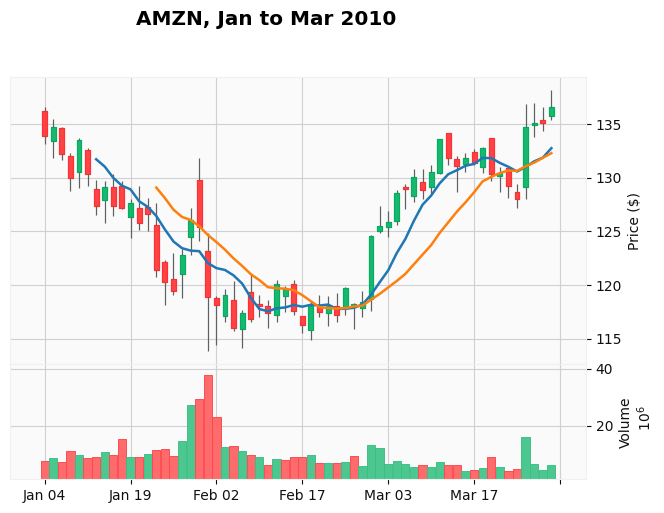

In [51]:
mpf.plot(
    data_mpl[:60],
    mav=(7, 14),
    type="candle",
    volume=True,
    figscale=1,
    style="yahoo",
    title="AMZN, Jan to Mar 2010",
    ylabel="Price ($)",
    ylabel_lower="Volume",
    xrotation=0
    )